In [1]:
%pip install keras
%pip install tensorflow
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

2024-10-29 17:53:58.913874: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Feature Data Load
ppg_041 = pd.read_csv('../Data/ppg_features_041.csv')
ppg_427 = pd.read_csv('../Data/ppg_features_427.csv')
ppg_212 = pd.read_csv('../Data/ppg_features_212.csv')
ppg_224 = pd.read_csv('../Data/ppg_features_224.csv')
ppg_237 = pd.read_csv('../Data/ppg_features_237.csv')
ppg_240 = pd.read_csv('../Data/ppg_features_240.csv')
ppg_414 = pd.read_csv('../Data/ppg_features_414.csv')

# SBP Data Load
sbp_041 = pd.read_csv('../Data/sbp_041.csv')
sbp_427 = pd.read_csv('../Data/sbp_427.csv')
sbp_212 = pd.read_csv('../Data/sbp_212.csv')
sbp_224 = pd.read_csv('../Data/sbp_224.csv')
sbp_237 = pd.read_csv('../Data/sbp_237.csv')
sbp_240 = pd.read_csv('../Data/sbp_240.csv')
sbp_414 = pd.read_csv('../Data/sbp_414.csv')

# DBP Data Load
dbp_041 = pd.read_csv('../Data/dbp_041.csv')
dbp_427 = pd.read_csv('../Data/dbp_427.csv')
dbp_212 = pd.read_csv('../Data/dbp_212.csv')
dbp_224 = pd.read_csv('../Data/dbp_224.csv')
dbp_237 = pd.read_csv('../Data/dbp_237.csv')
dbp_240 = pd.read_csv('../Data/dbp_240.csv')
dbp_414 = pd.read_csv('../Data/dbp_414.csv')

In [4]:
# List of datasets
feature_data = [ppg_041,ppg_212,ppg_224,ppg_237,ppg_240,ppg_414,ppg_427]
sbp_data = [sbp_041,sbp_212,sbp_224,sbp_237,sbp_240,sbp_414,sbp_427]
dbp_data = [dbp_041,dbp_212,dbp_224,dbp_237,dbp_240,dbp_414,dbp_427]

# List for saving training set and test set
X_train_set = []
X_test_set = []
SBP_y_train_set =[]
SBP_y_test_set = []
DBP_y_train_set =[]
DBP_y_test_set = []

# For every datasets execute train_test_split
for i in range(len(feature_data)):
    X_train, X_test, SBP_Y_train, SBP_Y_test = train_test_split(feature_data[i], sbp_data[i], test_size=0.2, random_state=42)
    _, _, DBP_Y_train, DBP_Y_test = train_test_split(feature_data[i], dbp_data[i], test_size=0.2, random_state=42)

    # Save training set and test set
    X_train_set.append(X_train)
    X_test_set.append(X_test)
    SBP_y_train_set.append(SBP_Y_train)
    SBP_y_test_set.append(SBP_Y_test)
    DBP_y_train_set.append(DBP_Y_train)
    DBP_y_test_set.append(DBP_Y_test)

# Save the combined traning set and test set
X_train_combined = pd.concat(X_train_set, axis=0)
X_test_combined = pd.concat(X_test_set, axis=0)
SBP_Y_train_combined = pd.concat(SBP_y_train_set, axis=0)
SBP_Y_test_combined = pd.concat(SBP_y_test_set, axis=0)
DBP_Y_train_combined = pd.concat(DBP_y_train_set, axis=0)
DBP_Y_test_combined = pd.concat(DBP_y_test_set, axis=0)

# Change the dimension
# X_train_combined = X_train_combined.values.reshape(-1, X_train_combined.shape[1], 1)
# X_test_combined = X_test_combined.values.reshape(-1, X_test_combined.shape[1], 1)
# SBP_Y_train_combined = SBP_Y_train_combined.values.reshape(-1, SBP_Y_train_combined.shape[1],1)
# SBP_Y_test_combined = SBP_Y_test_combined.values.reshape(-1, SBP_Y_test_combined.shape[1], 1)
# DBP_Y_train_combined = DBP_Y_train_combined.values.reshape(-1, DBP_Y_train_combined[1], 1)
# DBP_Y_test_combined = DBP_Y_test_combined.values.reshape(-1, DBP_Y_test_combined[1], 1)

# 결과 확인
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("SBP_Y_train_combined shape:", SBP_Y_train_combined.shape)
print("SBP_Y_test_combined shape:", SBP_Y_test_combined.shape)
print("DBP_Y_train_combined shape:", DBP_Y_train_combined.shape)
print("DBP_Y_test_combined shape:", DBP_Y_test_combined.shape)

X_train_combined shape: (5975, 26)
X_test_combined shape: (1496, 26)
SBP_Y_train_combined shape: (5975, 1)
SBP_Y_test_combined shape: (1496, 1)
DBP_Y_train_combined shape: (5975, 1)
DBP_Y_test_combined shape: (1496, 1)


In [5]:
X_train_combined = X_train_combined.values.reshape(-1, X_train_combined.shape[1], 1)
X_test_combined = X_test_combined.values.reshape(-1, X_test_combined.shape[1], 1)

In [6]:
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)

X_train_combined shape: (5975, 26, 1)
X_test_combined shape: (1496, 26, 1)


In [7]:
# 1D CNN 모델 정의 (회귀용)
sbp_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 활성화 함수 없음
])

sbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = sbp_model.fit(
    X_train_combined, SBP_Y_train_combined,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_combined, SBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")


# 검증 데이터로 모델 평가
val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2104.9905 - mae: 33.4820 - val_loss: 421.6115 - val_mae: 14.9716
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 830.8054 - mae: 22.8023 - val_loss: 376.6068 - val_mae: 14.4486
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 728.2292 - mae: 21.2893 - val_loss: 319.6303 - val_mae: 13.3767
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 638.9374 - mae: 19.8762 - val_loss: 223.1750 - val_mae: 11.7511
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 567.4926 - mae: 18.6708 - val_loss: 204.1869 - val_mae: 10.9945
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 567.5546 - mae: 18.5246 - val_loss: 184.7756 - val_mae: 10.3708
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 502.6161 - mae: 17.6778 - val_loss: 192.5422 - val_mae: 10.5353
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 513.8581 - mae: 17.7220 - val_loss: 238.2017 - val_mae: 12.2224
Epoch 9

In [9]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = sbp_model.fit(
    X_train_combined, SBP_Y_train_combined,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_combined, SBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")


# 검증 데이터로 모델 평가
val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 420.6417 - mae: 16.0283 - val_loss: 177.4781 - val_mae: 10.4273
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 448.0482 - mae: 16.3584 - val_loss: 147.8187 - val_mae: 9.2814
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 428.7095 - mae: 16.0417 - val_loss: 174.5527 - val_mae: 10.3866
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 412.9308 - mae: 15.7554 - val_loss: 139.8834 - val_mae: 8.8873
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 425.8672 - mae: 16.1773 - val_loss: 137.4271 - val_mae: 8.7349
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 431.3186 - mae: 16.2000 - val_loss: 133.3212 - val_mae: 8.4739
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 410.3465 - mae: 15.7681 - val_loss: 136.8907 - val_mae: 8.7108
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 437.0156 - mae: 16.1256 - val_loss: 144.7146 - val_mae: 9.1630
Epoch 9/50
187

In [10]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = sbp_model.fit(
    X_train_combined, SBP_Y_train_combined,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_combined, SBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")


# 검증 데이터로 모델 평가
val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 375.2697 - mae: 15.1018 - val_loss: 148.1275 - val_mae: 8.9879
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 388.9445 - mae: 15.4271 - val_loss: 136.3534 - val_mae: 8.7761
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 365.0065 - mae: 14.9590 - val_loss: 129.3083 - val_mae: 8.3473
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 410.2056 - mae: 15.8127 - val_loss: 154.3818 - val_mae: 9.6530
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 388.4202 - mae: 15.1773 - val_loss: 133.4867 - val_mae: 8.5087
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 400.5582 - mae: 15.4752 - val_loss: 136.1529 - val_mae: 8.5696
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 396.9964 - mae: 15.4121 - val_loss: 167.8117 - val_mae: 10.0972
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 381.7303 - mae: 15.0798 - val_loss: 137.1218 - val_mae: 8.8575
Epoch 9/50
187/

In [11]:
# 모델 학습
history = sbp_model.fit(
    X_train_combined, SBP_Y_train_combined,
    epochs=60,
    batch_size=50,
    validation_data=(X_test_combined, SBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")

# 검증 데이터로 모델 평가
val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.4453 - mae: 15.0384 - val_loss: 137.7368 - val_mae: 8.8599
Epoch 2/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.3409 - mae: 14.8139 - val_loss: 134.4173 - val_mae: 8.6685
Epoch 3/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 378.6031 - mae: 14.9039 - val_loss: 132.6905 - val_mae: 8.4663
Epoch 4/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 364.5589 - mae: 14.7012 - val_loss: 131.3856 - val_mae: 8.5496
Epoch 5/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390.2239 - mae: 15.1259 - val_loss: 128.2537 - val_mae: 8.3537
Epoch 6/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.0381 - mae: 14.7341 - val_loss: 170.7204 - val_mae: 10.3042
Epoch 7/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 379.2394 - mae: 14.8785 - val_loss: 126.9931 - val_mae: 8.2530
Epoch 8/60
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 374.4845 - mae: 14.9952 - val_loss: 127.3723 - val_mae: 8.3235
Epoch 9/60
120/

In [12]:
# 모델 학습
history = sbp_model.fit(
    X_train_combined, SBP_Y_train_combined,
    epochs=500,
    batch_size=60,
    validation_data=(X_test_combined, SBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

# 검증 데이터로 모델 평가
val_loss, val_mae = sbp_model.evaluate(X_test_combined, SBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 369.1114 - mae: 14.8585 - val_loss: 129.6820 - val_mae: 8.3216
Epoch 2/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 361.4060 - mae: 14.8227 - val_loss: 133.4282 - val_mae: 8.5089
Epoch 3/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 361.2442 - mae: 14.6649 - val_loss: 138.7159 - val_mae: 8.7961
Epoch 4/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.9525 - mae: 14.8950 - val_loss: 128.7979 - val_mae: 8.3958
Epoch 5/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 372.3510 - mae: 14.8753 - val_loss: 143.8685 - val_mae: 9.1444
Epoch 6/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 377.1153 - mae: 14.9644 - val_loss: 131.6835 - val_mae: 8.5489
Epoch 7/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 373.3239 - mae: 14.9451 - val_loss: 153.6161 - val_mae: 9.5584
Epoch 8/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 387.3122 - mae: 14.9737 - val_loss: 130.6747 - val_mae: 8.5363
Epoch 9/

In [13]:
# 1D CNN 모델 정의 (회귀용)
dbp_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 활성화 함수 없음
])

dbp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/sw/Documents/BCI_LAB/Implement/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = dbp_model.fit(
    X_train_combined, DBP_Y_train_combined,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_combined, DBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")


# 검증 데이터로 모델 평가
val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 814.0879 - mae: 19.6473 - val_loss: 153.7584 - val_mae: 9.7467
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 245.4563 - mae: 12.3811 - val_loss: 120.1664 - val_mae: 8.5868
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 206.5826 - mae: 11.2488 - val_loss: 96.3324 - val_mae: 7.8325
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 191.2813 - mae: 10.8097 - val_loss: 84.8620 - val_mae: 6.6026
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 165.2897 - mae: 10.0499 - val_loss: 81.4299 - val_mae: 7.0315
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 149.2821 - mae: 9.5124 - val_loss: 70.5648 - val_mae: 6.2014
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150.9942 - mae: 9.4807 - val_loss: 71.7598 - val_mae: 6.0822
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 148.1656 - mae: 9.3043 - val_loss: 80.1840 - val_mae: 6.4716
Epoch 9/50
187/187 ━━━━━━

In [15]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = dbp_model.fit(
    X_train_combined, DBP_Y_train_combined,
    epochs=600,
    batch_size=50,
    validation_data=(X_test_combined, DBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

if early_stopping.stopped_epoch > 0:
    print(f"Early stopping occurred at epoch {early_stopping.stopped_epoch}")
else:
    print("Early stopping did not occur")


# 검증 데이터로 모델 평가
val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138.5911 - mae: 8.9324 - val_loss: 61.7237 - val_mae: 5.6839
Epoch 2/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140.1083 - mae: 9.0309 - val_loss: 82.2216 - val_mae: 6.7296
Epoch 3/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.7899 - mae: 8.9859 - val_loss: 67.4617 - val_mae: 5.8987
Epoch 4/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.2689 - mae: 8.7558 - val_loss: 64.1510 - val_mae: 5.7665
Epoch 5/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.9539 - mae: 8.7568 - val_loss: 69.0053 - val_mae: 6.0186
Epoch 6/600
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.4164 - mae: 8.6921 - val_loss: 62.8696 - val_mae: 5.6856
Early stopping occurred at epoch 5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.1047 - mae: 5.5880
Validation MAE: 5.68
Validation Loss: 61.723732


In [16]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = dbp_model.fit(
    X_train_combined, DBP_Y_train_combined,
    epochs=300,
    batch_size=60,
    validation_data=(X_test_combined, DBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

# 검증 데이터로 모델 평가
val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation Loss: {val_loss:2f}")

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.4226 - mae: 8.8193 - val_loss: 73.7024 - val_mae: 6.2942
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.5176 - mae: 8.9118 - val_loss: 60.4125 - val_mae: 5.5540
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.4954 - mae: 8.9707 - val_loss: 61.1457 - val_mae: 5.5915
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.0044 - mae: 8.8948 - val_loss: 60.2669 - val_mae: 5.6022
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133.8607 - mae: 8.8109 - val_loss: 63.2098 - val_mae: 5.7358
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137.8876 - mae: 9.0093 - val_loss: 59.4788 - val_mae: 5.5395
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140.1936 - mae: 9.0099 - val_loss: 65.3370 - val_mae: 5.8065
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 131.9721 - mae: 8.8464 - val_loss: 59.1911 - val_mae: 5.5990
Epoch 9/300
100/100 ━━━━

In [17]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = dbp_model.fit(
    X_train_combined, DBP_Y_train_combined,
    epochs=200,
    batch_size=50,
    validation_data=(X_test_combined, DBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

# 검증 데이터로 모델 평가
val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")

Epoch 1/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140.1711 - mae: 8.9223 - val_loss: 66.7969 - val_mae: 5.8836
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.4087 - mae: 8.9920 - val_loss: 64.4343 - val_mae: 5.9857
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.2446 - mae: 8.9224 - val_loss: 70.9856 - val_mae: 6.0373
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.3577 - mae: 8.5320 - val_loss: 62.4581 - val_mae: 5.6644
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.9512 - mae: 8.7676 - val_loss: 68.2254 - val_mae: 5.9284
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.2110 - mae: 8.8207 - val_loss: 60.5007 - val_mae: 5.5967
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 134.8764 - mae: 8.8805 - val_loss: 61.1891 - val_mae: 5.6218
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133.3353 - mae: 8.8841 - val_loss: 69.0604 - val_mae: 6.0474
Epoch 9/200
120/120 ━━━━

In [18]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 모델 학습
history = dbp_model.fit(
    X_train_combined, DBP_Y_train_combined,
    epochs=150,
    batch_size=32,
    validation_data=(X_test_combined, DBP_Y_test_combined),
    callbacks=[early_stopping, model_checkpoint]
)

# 검증 데이터로 모델 평가
val_loss, val_mae = dbp_model.evaluate(X_test_combined, DBP_Y_test_combined)
print(f"Validation MAE: {val_mae:.2f}")

Epoch 1/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 138.0439 - mae: 9.0050 - val_loss: 97.3511 - val_mae: 7.3367
Epoch 2/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 135.1364 - mae: 8.8817 - val_loss: 61.9033 - val_mae: 5.7668
Epoch 3/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 145.3266 - mae: 9.1528 - val_loss: 57.8832 - val_mae: 5.5126
Epoch 4/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 133.5153 - mae: 8.8776 - val_loss: 67.0152 - val_mae: 5.9306
Epoch 5/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134.6318 - mae: 8.8682 - val_loss: 62.7252 - val_mae: 5.6580
Epoch 6/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 128.1153 - mae: 8.6456 - val_loss: 65.9646 - val_mae: 5.7953
Epoch 7/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 126.0608 - mae: 8.6189 - val_loss: 61.7360 - val_mae: 5.6756
Epoch 8/150
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 125.8873 - mae: 8.5433 - val_loss: 60.7398 - val_mae: 5.6735
47/47 ━━━━━━━━━━━━━━━━━━

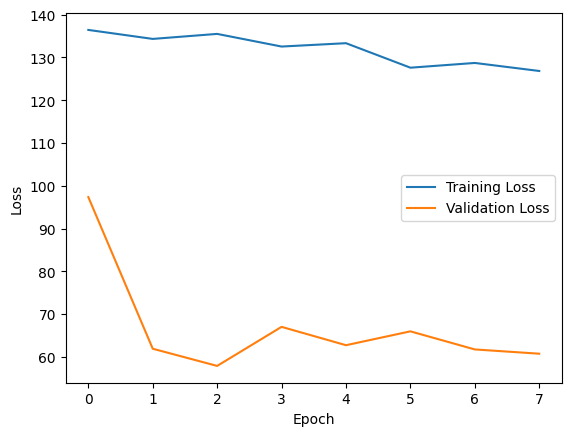

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()